# MODEL BUILDING

# TRAIN AND TEST THE DATA

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [2]:
x_train = train_datagen.flow_from_directory(r'C:\Users\balag\OneDrive\Desktop\Nalaiya Thiran\Project Development Phase\Sprint 1\Dataset\conversation engine for deaf and dumb\Dataset\training_set', target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 15750 images belonging to 9 classes.


In [3]:
x_test = test_datagen.flow_from_directory(r'C:\Users\balag\OneDrive\Desktop\Nalaiya Thiran\Project Development Phase\Sprint 1\Dataset\conversation engine for deaf and dumb\Dataset\test_set',target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 2250 images belonging to 9 classes.


# MODEL BUILDING

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [5]:
model=Sequential()

In [6]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

In [7]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
model.add(Flatten())

In [9]:
model.add(Dense( units=512, activation='relu'))

In [10]:
model.add(Dense(units=9, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit_generator(x_train, steps_per_epoch=24, epochs=10, validation_data=x_test,validation_steps=40)

C:\Users\balag\AppData\Local\Temp\ipykernel_21972\3523359466.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=24, epochs=10, validation_data=x_test,validation_steps=40)


Epoch 1/10
24/24 [==============================] - 107s 4s/step - loss: 1.4899 - accuracy: 0.6113 - val_loss: 0.5091 - val_accuracy: 0.8467
Epoch 2/10
24/24 [==============================] - 50s 2s/step - loss: 0.3328 - accuracy: 0.9072
Epoch 3/10
24/24 [==============================] - 36s 1s/step - loss: 0.1717 - accuracy: 0.9533
Epoch 4/10
24/24 [==============================] - 26s 1s/step - loss: 0.1114 - accuracy: 0.9709
Epoch 5/10
24/24 [==============================] - 22s 930ms/step - loss: 0.0723 - accuracy: 0.9832
Epoch 6/10
24/24 [==============================] - 85s 4s/step - loss: 0.0584 - accuracy: 0.9858
Epoch 7/10
24/24 [==============================] - 21s 866ms/step - loss: 0.0414 - accuracy: 0.9901
Epoch 8/10
24/24 [==============================] - 18s 728ms/step - loss: 0.0285 - accuracy: 0.9937
Epoch 9/10
24/24 [==============================] - 17s 706ms/step - loss: 0.0256 - accuracy: 0.9937
Epoch 10/10
24/24 [==============================] - 18s 732ms/

In [18]:
model.save('RSL.h5')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

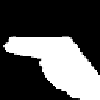

In [32]:
img = image.load_img(r'C:\Users\balag\OneDrive\Desktop\Content\Dataset\test_set\H\105.png',target_size = (100,100))
img

In [33]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [34]:
img=image.load_img(r'C:\Users\balag\OneDrive\Desktop\Content\Dataset\test_set\H\105.png')
detect(img)

1/1 [==============================] - 1s 639ms/step
THE PREDICTED LETTER IS  H


In [38]:
img = image.load_img(r'C:\Users\balag\OneDrive\Desktop\Content\Dataset\test_set\A\130.png')
pred=detect(img)

1/1 [==============================] - 0s 25ms/step
THE PREDICTED LETTER IS  A


In [39]:
img=image.load_img(r'C:\Users\balag\OneDrive\Desktop\Content\Dataset\test_set\c\110.png')
detect(img)

1/1 [==============================] - 0s 30ms/step
THE PREDICTED LETTER IS  C
